In [1]:
import sys
import requests
import os
from helpers import (
    base64_to_png,
    png_to_base64,
    get_random_id
)
import json
from IPython import display 
from IPython.core.display import HTML
import IPython.core.display as html_display
from base64 import b64decode


def display_base64(images):
    html_string = ""
    for image in images:
        html_string += f'<img style="max-width: 100%; margin: 5px;" src="data:image/png;base64,{image}" />'
    
    return display.HTML(html_string)


# CREATE QR Section

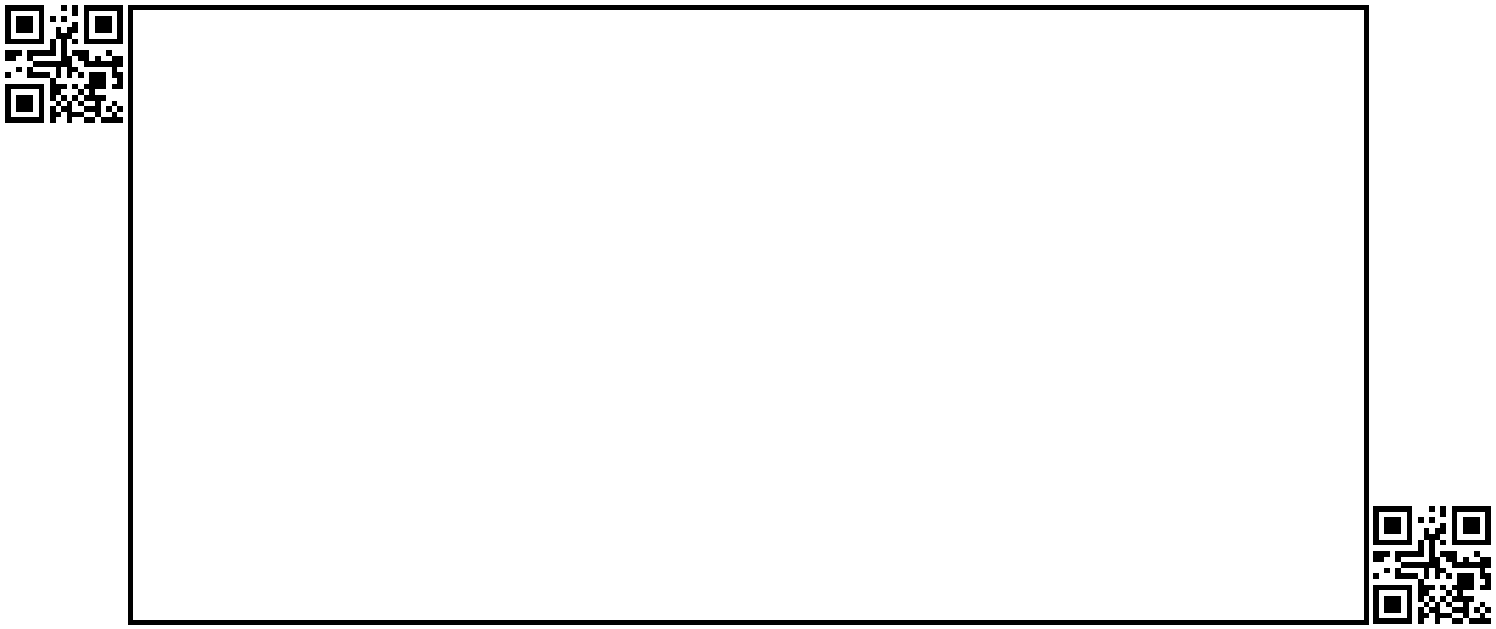

In [ ]:

response:requests.Response = requests.post(
    'http://localhost:8080/create_qr_section', 
    
    json={
        'Base64Image': png_to_base64('./test_input/qr_section_input.png'),
        'data': 'test_text'
    },
    headers={
        "Content-Type": 'application/json'
    }
)
result = response.json()
if ("error" in result):
    print(result)
    raise UserWarning('Exit Early')
result = result["output"]
    
base_64_data = result

display_base64([base_64_data])


# Crop

In [ ]:

response:requests.Response = requests.post(
    'http://localhost:8080/crop', 
    
    json={
        'Base64Image': png_to_base64('./test_input/crop_input.png')
    },
    headers={
        "Content-Type": 'application/json'
    }
)
result = response.json()

if ("error" in result or "output" not in result):
    print(result)
    raise UserWarning('Exit Early')
result = result["output"]
base_64_data = result
display_base64([base_64_data])
base64_to_png(base_64_data, './test_output/crop_output.png')


# extract_red_pen

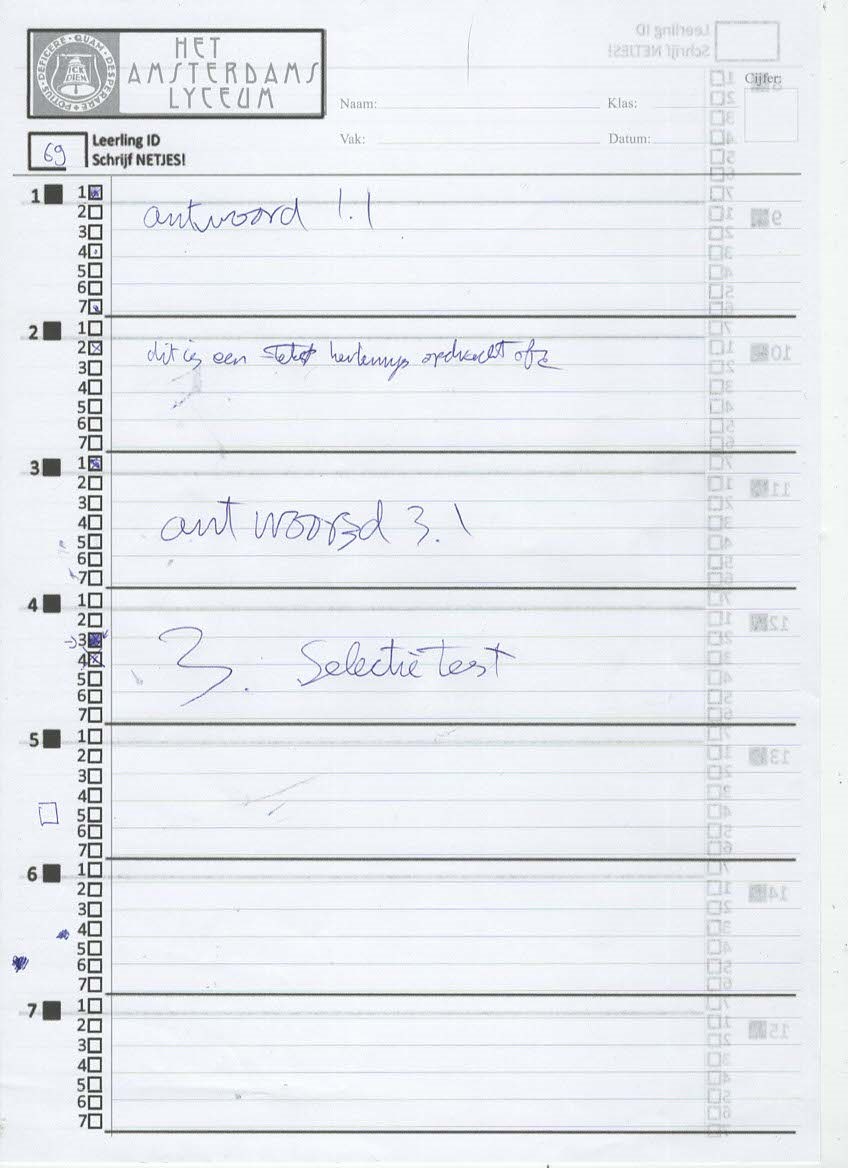

In [ ]:
response:requests.Response = requests.post(
    'http://localhost:8080/extract_red_pen', 
    
    json={
        'Base64Image': png_to_base64('./test_input/input.png')
    },
    headers={
        "Content-Type": 'application/json'
    }
)
data = response.json()["output"]
clean = data["clean"]
red_pen = data["red_pen"]
display_base64([clean, red_pen])
# display.Image(b64decode())
# display.Image(b64decode(red_pen))


# get_student_id

In [ ]:
response:requests.Response = requests.post(
    'http://localhost:8080/get_student_id', 
    
    json={
        'Base64Image': png_to_base64('./test_input/input.png'),
    },
    headers={
        "Content-Type": 'application/json'
    }
)
result = response.json()
if ("error" in result):
    print(result)
    raise UserWarning('Exit Early')
result = result["output"]
    
print(result)

69


# get_qr_sections

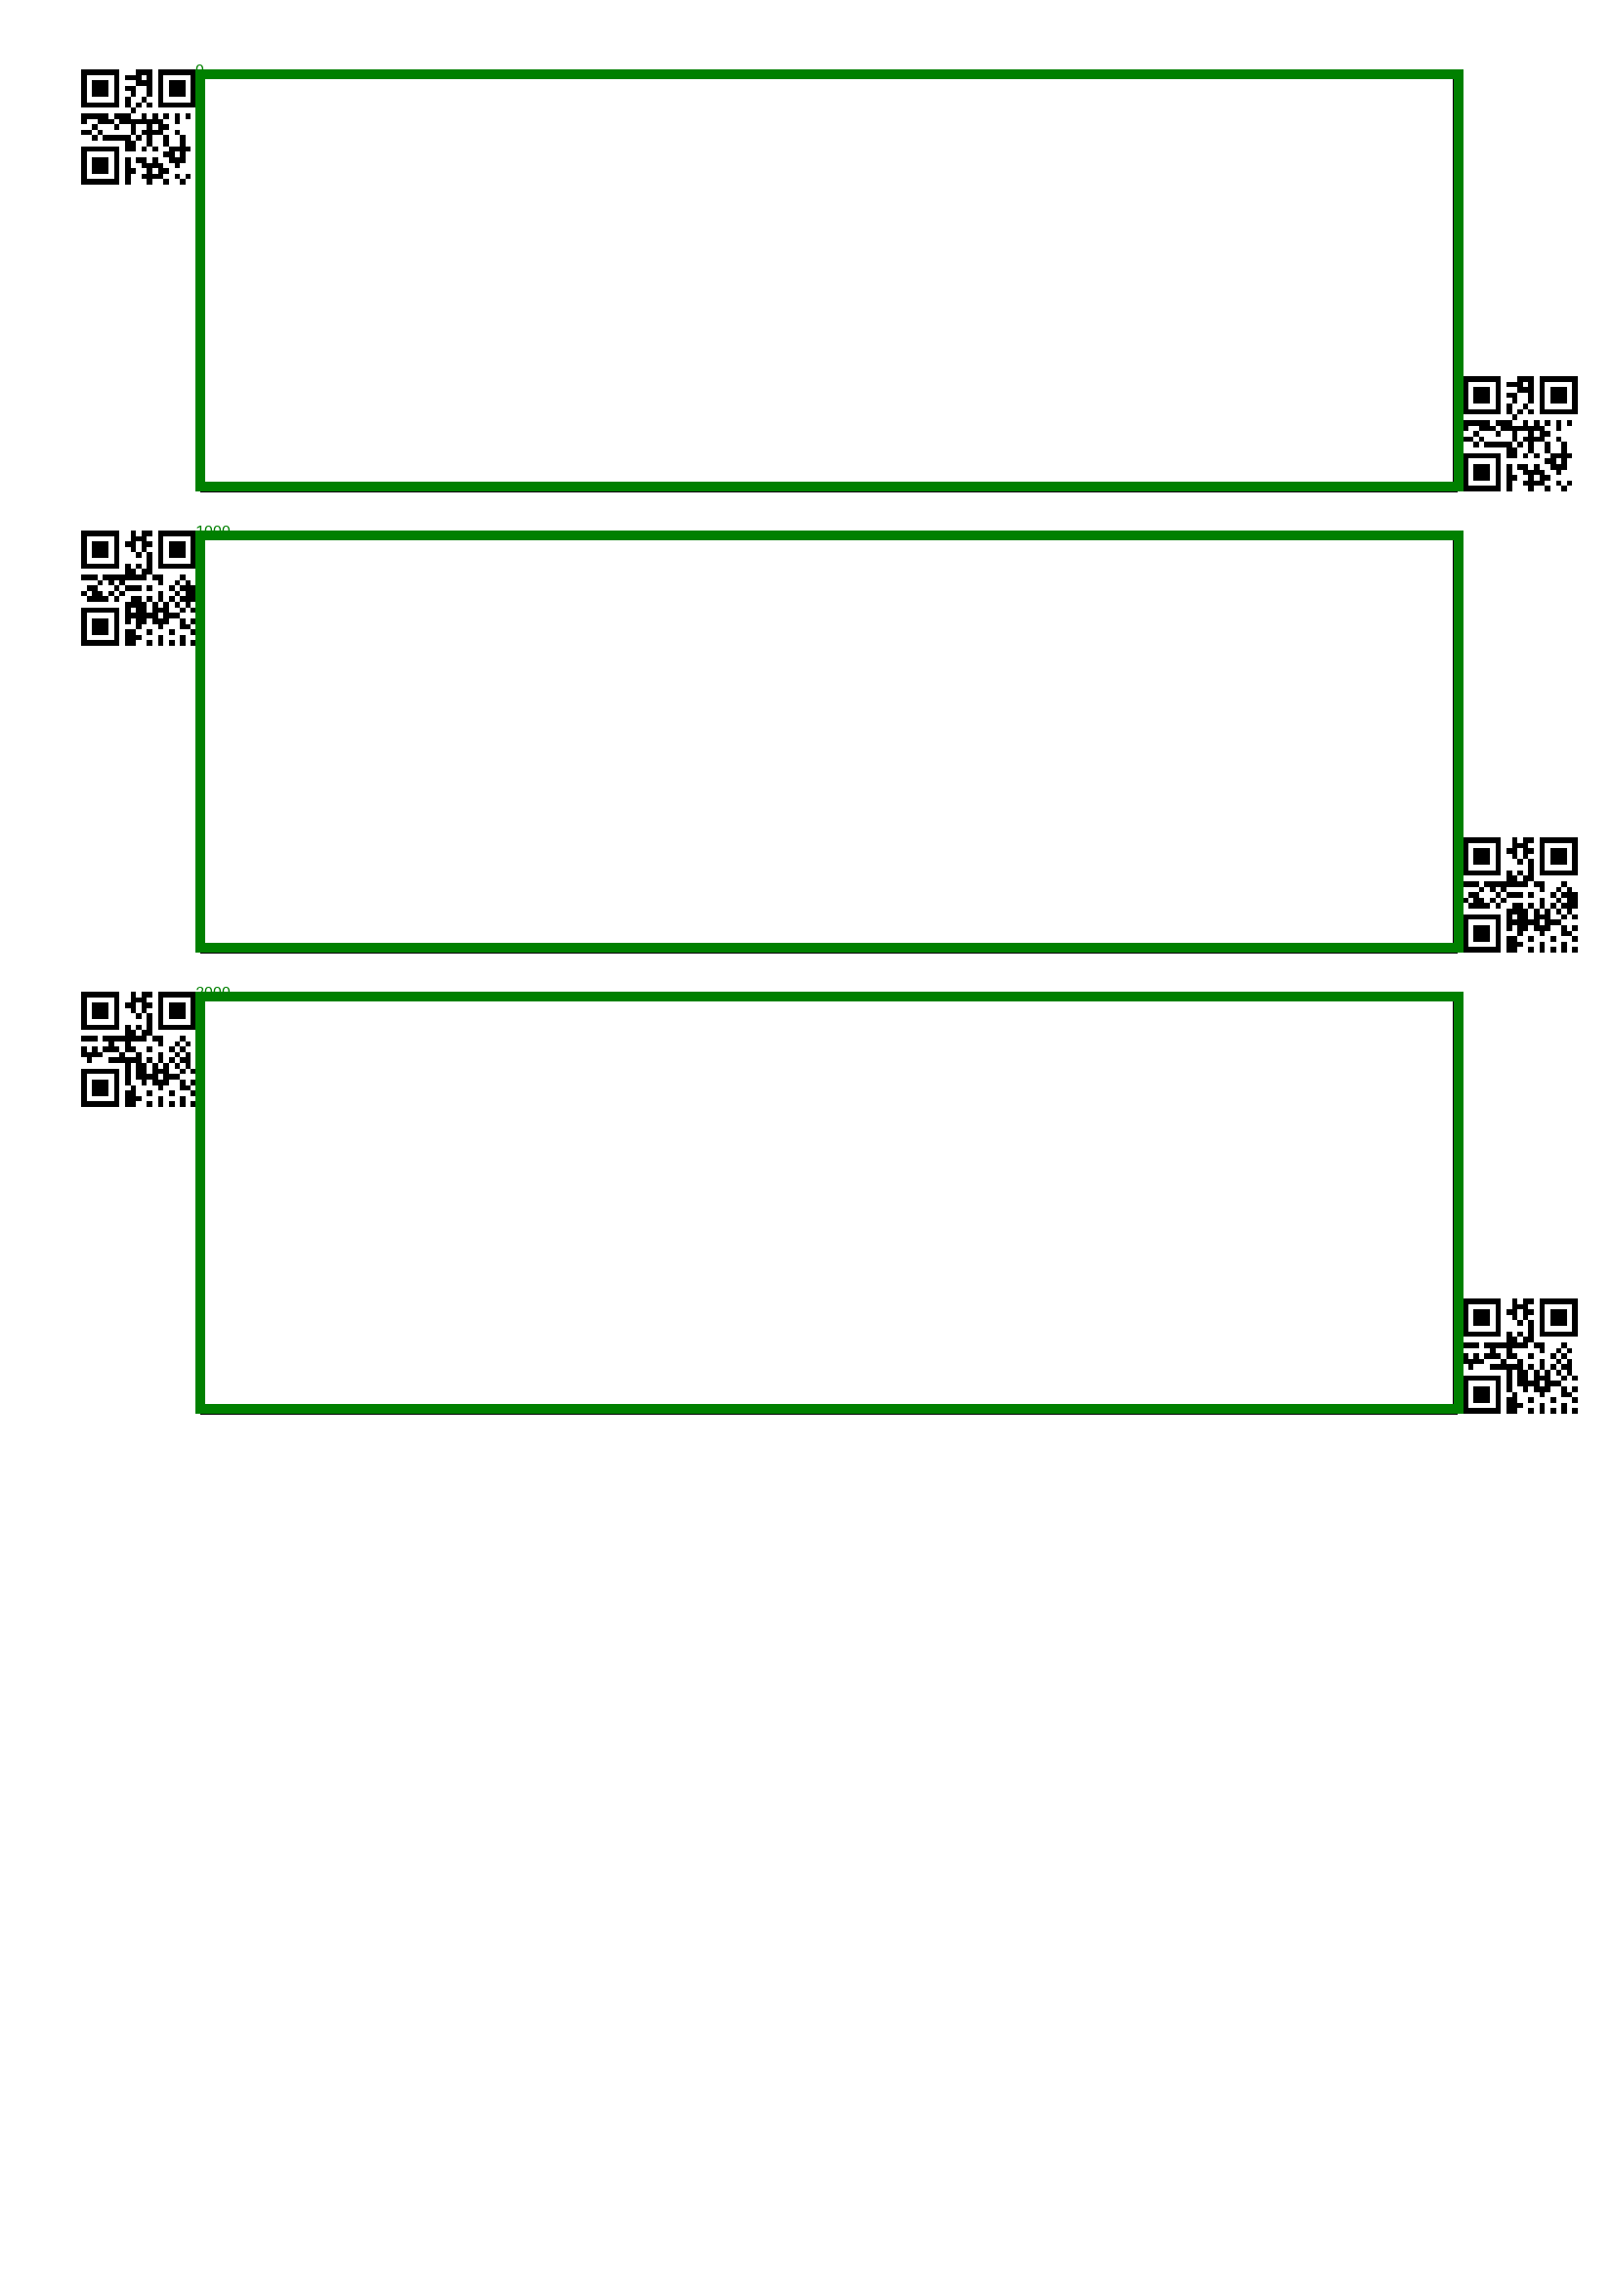

In [ ]:
response:requests.Response = requests.post(
    'http://localhost:8080/get_qr_sections', 
    
    json={
        'Base64Image': png_to_base64('./test_input/qr_section_input.png')
    },
    headers={
        "Content-Type": 'application/json'
    }
)
result = response.json()
if ("error" in result):
    print(result)
    raise UserWarning('Exit Early')
result = result["output"]
    
base_64_data = result["image"]
display_base64([base_64_data])

# detect_squares

[[184, 20, 44, 63], [321, 19, 43, 61], [458, 18, 42, 61], [594, 19, 43, 61], [729, 19, 43, 61], [864, 19, 43, 61], [1001, 19, 43, 61]]


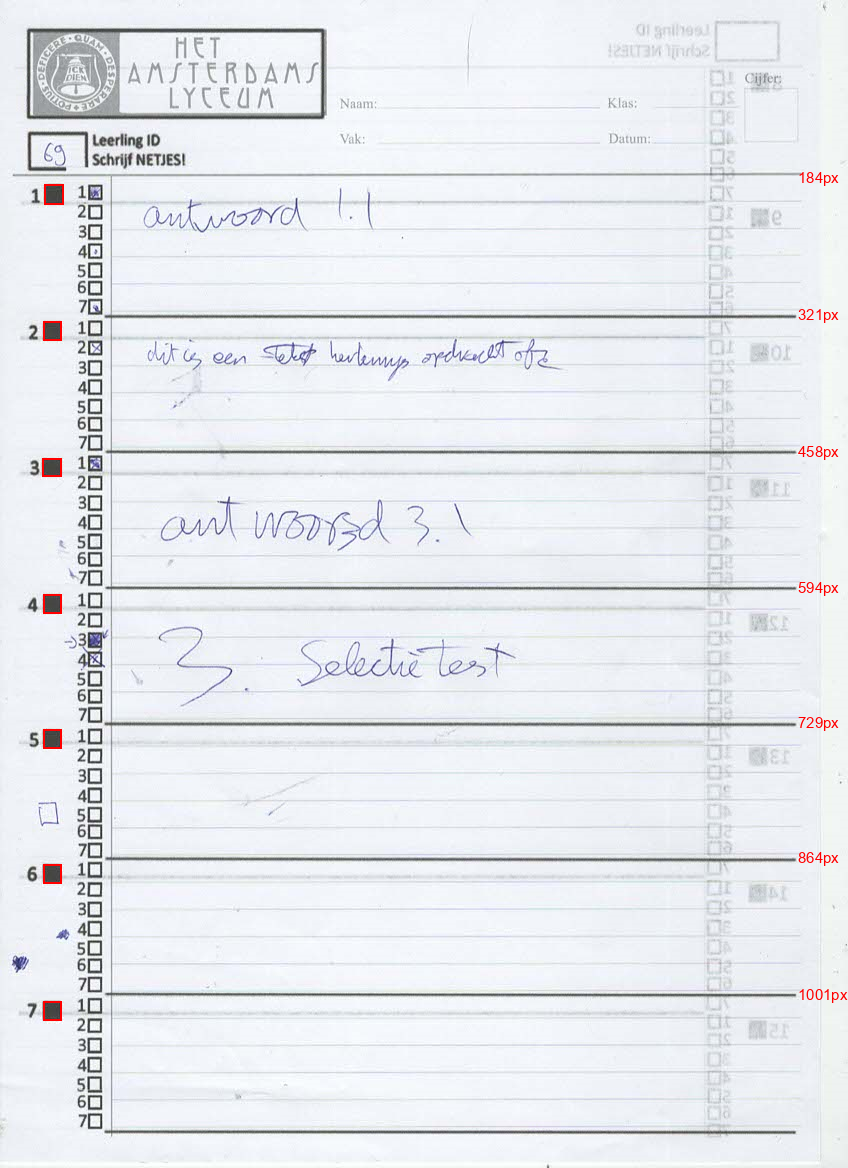

In [ ]:
response:requests.Response = requests.post(
    'http://localhost:8080/detect_squares', 
    
    json={
        'Base64Image': png_to_base64('./test_input/input.png')
    },
    headers={
        "Content-Type": 'application/json'
    }
)
result = response.json()
if ("error" in result):
    print(result)
    raise UserWarning('Exit Early')
result = result["output"]
    
base_64_data = result["image"]
print(result["data"])
display_base64([base_64_data])

# extract_sections


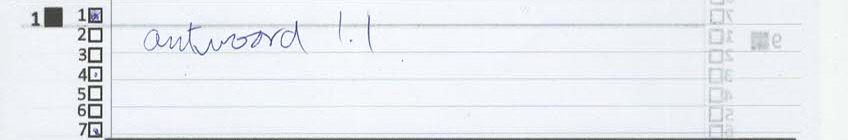
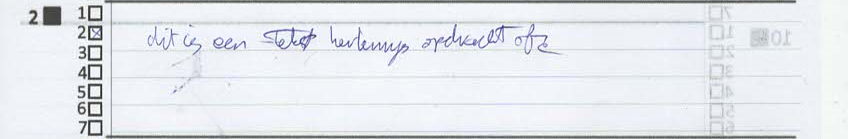
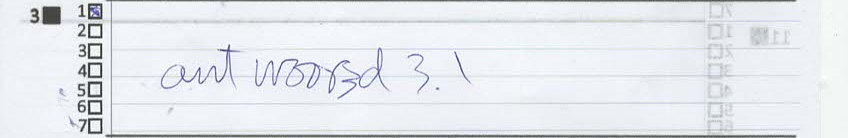
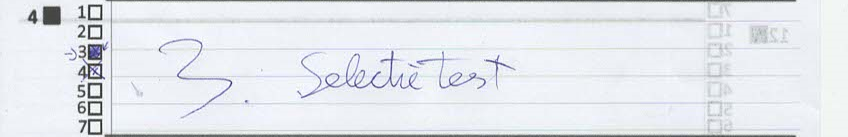
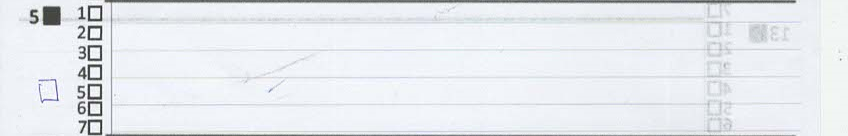
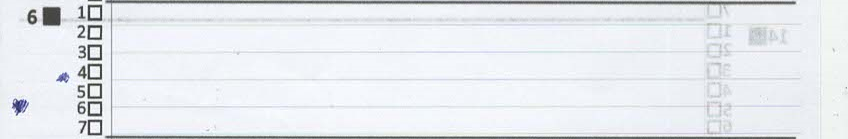
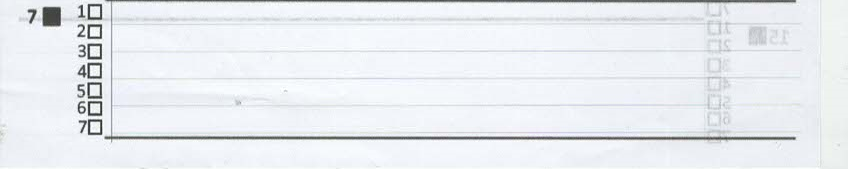

In [13]:
response:requests.Response = requests.post(
    'http://localhost:8080/extract_sections', 
    
    json={
        'Base64Image': png_to_base64('./test_input/input.png'),
        "square_data": [[184, 20, 44, 63], [322, 18, 43, 61], [459, 17, 43, 61], [595, 18, 43, 61], [730, 18, 43, 61], [864, 18, 43, 60], [1001, 19, 43, 61]]
    },
    headers={
        "Content-Type": 'application/json'
    }
)
result = response.json()
if ("error" in result):
    print(result)
    raise UserWarning('Exit Early')
result = result["output"]
display_base64(map(lambda x: x["full"], result["sections"]))


# question_selector_info

In [15]:
response:requests.Response = requests.post(
    'http://localhost:8080/question_selector_info', 
    
    json={
        'Base64Image': png_to_base64('./test_input/section_selection_input.png')
    },
    headers={
        "Content-Type": 'application/json'
    }
)
result = response.json()
if ("error" in result):
    print(result)
    raise UserWarning('Exit Early')
result = result["output"]
print(result)

{'checkboxes': [{'certainty': 1.0, 'checked_chance': 1.0, 'number': 1, 'percentage_filled': 100.0}, {'certainty': 0.0, 'checked_chance': 0.0, 'number': 2, 'percentage_filled': 0.0}, {'certainty': 0.0, 'checked_chance': 0.0, 'number': 3, 'percentage_filled': 0.0}, {'certainty': 1.0, 'checked_chance': 1.0, 'number': 4, 'percentage_filled': 100.0}, {'certainty': 0.0, 'checked_chance': 0.0, 'number': 5, 'percentage_filled': 0.0}, {'certainty': 0.0, 'checked_chance': 0.0, 'number': 6, 'percentage_filled': 0.0}, {'certainty': 1.0, 'checked_chance': 1.0, 'number': 7, 'percentage_filled': 100.0}], 'delta_time_s': 5.058984756469727, 'model_used': 'gpt-4o-mini', 'model_version': 'gpt-4o-mini-2024-07-18', 'selected_question': 4, 'timestamp': 1732272924, 'tokens_used': 8914}


# link_answer_sections


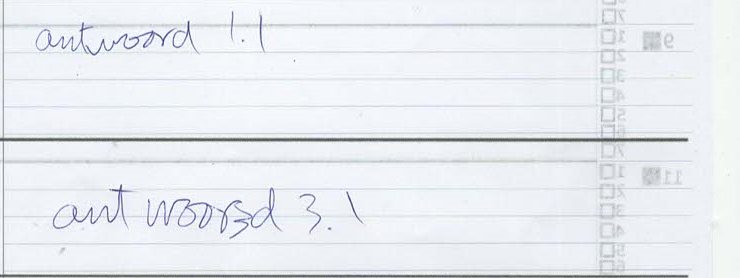

In [17]:
response:requests.Response = requests.post(
    'http://localhost:8080/link_answer_sections', 
    
    json={
        'sections': [
            png_to_base64('./test_input/answer1_1.png'),
            png_to_base64('./test_input/answer3_1.png')

        ]
    },
    headers={
        "Content-Type": 'application/json'
    }
)
result = response.json()
if ("error" in result):
    print(result)
    raise UserWarning('Exit Early')
result = result["output"]
display_base64([result])

# extract_text

In [18]:
response:requests.Response = requests.post(
    'http://localhost:8080/extract_text', 
    
    json={
        'Base64Image': png_to_base64('./test_input/test_extract_input.png')
    },
    headers={
        "Content-Type": 'application/json'
    }
)
result = response.json()
if ("error" in result):
    print(result)
    raise UserWarning('Exit Early')
result = result["output"]
print(result)

{'correctly_spelled_text': 'antwoord 1.1\nantwoord 3.1', 'delta_time_s': 2.6668295860290527, 'model_used': 'gpt-4o-mini', 'model_version': 'gpt-4o-mini-2024-07-18', 'raw_text': 'antwoord 1.1\nantwoord 3.1', 'spelling_corrections': [{'changes': 'antwoord', 'original': 'antwoord'}, {'changes': 'antwoord', 'original': 'ant woord'}], 'timestamp': 1732273055, 'tokens_used': 14535}


# Scan Page


In [17]:
response:requests.Response = requests.post(
    'http://localhost:8080/scan_page', 
    
    json={
        'Base64Image': png_to_base64('./test_input/input.png')
    },
    headers={
        "Content-Type": 'application/json'
    }
)
result = response.json()
if ("error" in result):
    print(result)
    raise UserWarning('Exit Early')
result = result["output"]

with open('./test_output/test_output.json', 'w') as f:
    json.dump(result, f)

{'error': "'selected_question'"}


UserWarning: Exit Early

In [ ]:
with open('./test_output/test_output.json', 'r') as f:
    result = json.load(f)

if ("output" not in result):
    raise UserWarning('Exit Early')
    
display_base64([result["output"]["questions"][0]["image"]])

TypeError: load() takes 1 positional argument but 2 were given